### Data Exploration and Preprocessing:
Analyze the dataset to understand the distribution of features and target variable.
Handle missing values, outliers, and perform necessary data cleaning.
Engineer new features that could enhance model performance.

In [1]:
import pandas as pd
import numpy as np

# Load the dataset (replace with the correct file path)
file_path = "german_credit_data.csv"  # Replace with actual path
df = pd.read_csv(file_path)

# Show the first few rows of the dataset
df.head()


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [2]:

df.head()
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [3]:
# Drop unnecessary columns like 'Unnamed: 0' if present
df.drop(columns=['Unnamed: 0'], inplace=True)

# Check for missing values
missing_values = df.isnull().sum()
print(f"Missing values:\n{missing_values}")

# Handle missing values by filling 'Saving accounts' and 'Checking account' columns with 'unknown'
df['Saving accounts'].fillna('unknown', inplace=True)
df['Checking account'].fillna('unknown', inplace=True)

# Verify if missing values have been handled
missing_values_after = df.isnull().sum()
print(f"\nMissing values after handling:\n{missing_values_after}")


Missing values:
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

Missing values after handling:
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64


In [4]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns
categorical_cols = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

# Initialize LabelEncoder and encode categorical columns
df_encoded = df.copy()  # Make a copy of the original dataframe to keep the original intact
label_encoders = {}  # To store the label encoders for each categorical column

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])  # Encode categorical column
    label_encoders[col] = le  # Store the encoder for future use

# Show the encoded data
df_encoded.head()


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,1,2,1,4,0,1169,6,5
1,22,0,2,1,0,1,5951,48,5
2,49,1,1,1,0,3,2096,12,3
3,45,1,2,0,0,0,7882,42,4
4,53,1,2,0,0,0,4870,24,1


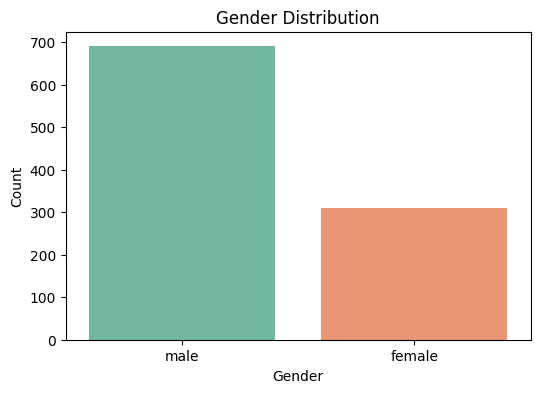

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=df, palette='Set2')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


In [7]:
from sklearn.preprocessing import StandardScaler

# List of numerical columns
numerical_cols = ['Age', 'Credit amount', 'Duration']

# Initialize StandardScaler for normalizing numerical columns
scaler = StandardScaler()

# Apply normalization to the numerical columns
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Show the data after normalization
df_encoded.head()


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,2.766456,1,2,1,4,0,-0.745131,-1.236478,5
1,-1.191404,0,2,1,0,1,0.949817,2.248194,5
2,1.183312,1,1,1,0,3,-0.416562,-0.738668,3
3,0.831502,1,2,0,0,0,1.634247,1.750384,4
4,1.535122,1,2,0,0,0,0.566664,0.256953,1


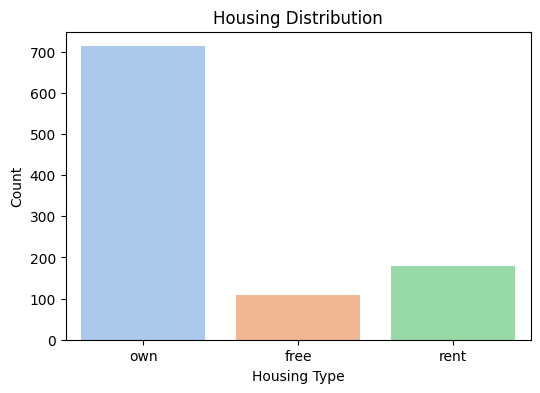

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Housing', data=df, palette='pastel')
plt.title('Housing Distribution')
plt.xlabel('Housing Type')
plt.ylabel('Count')
plt.show()


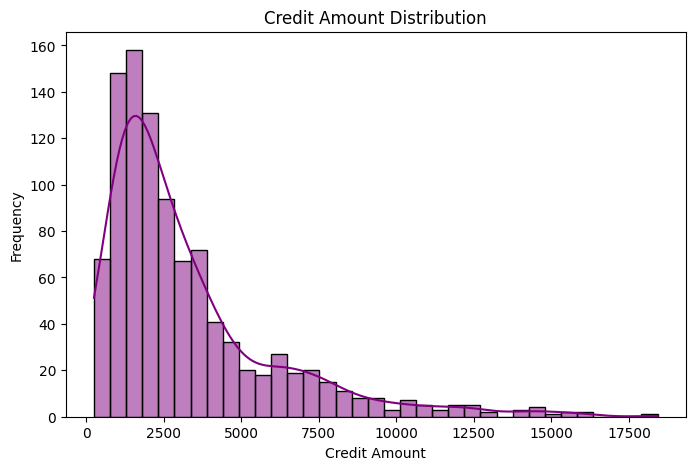

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Credit amount'], kde=True, color='purple')
plt.title('Credit Amount Distribution')
plt.xlabel('Credit Amount')
plt.ylabel('Frequency')
plt.show()


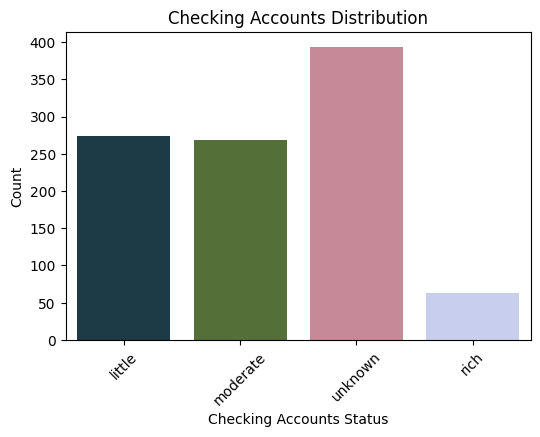

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Checking account', data=df, palette='cubehelix')
plt.title('Checking Accounts Distribution')
plt.xlabel('Checking Accounts Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [11]:
# Generate the target variable 'Risk'
# We'll define a simplistic rule for risk based on credit amount and duration, adjust as necessary for your project
credit_threshold = df_encoded['Credit amount'].median()  # Median value of credit amount
duration_threshold = df_encoded['Duration'].median()  # Median value of duration
df_encoded['Risk'] = ((df_encoded['Credit amount'] > credit_threshold) & (df_encoded['Duration'] < duration_threshold)).astype(int)

# Final feature-target split
X = df_encoded.drop(columns=['Risk'])  # Features (exclude the target column)
y = df_encoded['Risk']  # Target variable (Risk)


In [13]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Check the shapes of the train-test splits
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")


X_train shape: (800, 9)
X_test shape: (200, 9)


### Model Development:

In [14]:
# import xgboost as xgb
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Initialize XGBoost model with hyperparameters
# xgb_model = xgb.XGBClassifier(
#     learning_rate=0.05,      # controls step size while moving toward minimum
#     max_depth=5,             # maximum depth of a tree
#     n_estimators=200,        # number of trees
#     subsample=0.8,           # percentage of samples used per tree
#     colsample_bytree=0.8,    # percentage of features used per tree
#     random_state=42,
#     use_label_encoder=False, # avoid warning (for newer XGBoost versions)
#     eval_metric='logloss'    # loss function for binary classification
# )

# # Train the XGBoost model
# xgb_model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred_xgb = xgb_model.predict(X_test)

# # Evaluate the model
# print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

# # Confusion Matrix for XGBoost
# conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)



# # Evaluate model performance with metrics
# accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
# precision_xgb = precision_score(y_test, y_pred_xgb)
# recall_xgb = recall_score(y_test, y_pred_xgb)
# f1_xgb = f1_score(y_test, y_pred_xgb)

# print(f" Accuracy : {accuracy_xgb:.4f}")
# print(f" Precision: {precision_xgb:.4f}")
# print(f" Recall   : {recall_xgb:.4f}")
# print(f" F1 Score : {f1_xgb:.4f}")

# 1. Import libraries
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# 2. Initialize XGBoost model with hyperparameters
xgb_model = xgb.XGBClassifier(
    learning_rate=0.05,      # Controls the step size at each iteration
    max_depth=5,             # Maximum depth of a tree
    n_estimators=200,        # Number of boosting rounds (trees)
    subsample=0.8,           # Subsample ratio of the training instances
    colsample_bytree=0.8,    # Subsample ratio of columns for each tree
    random_state=42,
    use_label_encoder=False, # Avoid warnings for label encoding
    eval_metric='logloss'    # Evaluation metric for binary classification
)

# 3. Train the model
xgb_model.fit(X_train, y_train)

# 4. Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# 5. Evaluate the model
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))



accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print(f"Accuracy  : {accuracy_xgb:.4f}")
print(f"Precision : {precision_xgb:.4f}")
print(f"Recall    : {recall_xgb:.4f}")
print(f"F1 Score  : {f1_xgb:.4f}")


with open('xgboost_model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

print(" XGBoost model has been saved successfully as 'xgboost_model.pkl'")





XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       180
           1       1.00      0.95      0.97        20

    accuracy                           0.99       200
   macro avg       1.00      0.97      0.99       200
weighted avg       1.00      0.99      0.99       200

Accuracy  : 0.9950
Precision : 1.0000
Recall    : 0.9500
F1 Score  : 0.9744
 XGBoost model has been saved successfully as 'xgboost_model.pkl'


C:\Users\C PURUSHOTHAM\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [18:43:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


### Model Interpretation and Insights:

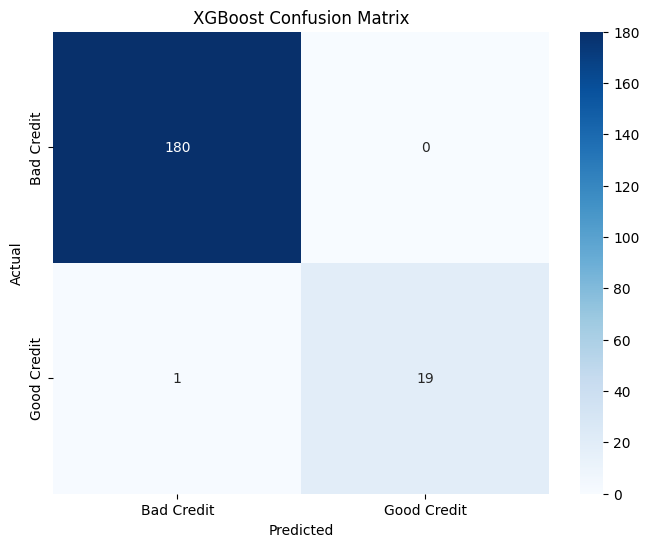

In [16]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=["Bad Credit", "Good Credit"], yticklabels=["Bad Credit", "Good Credit"])
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

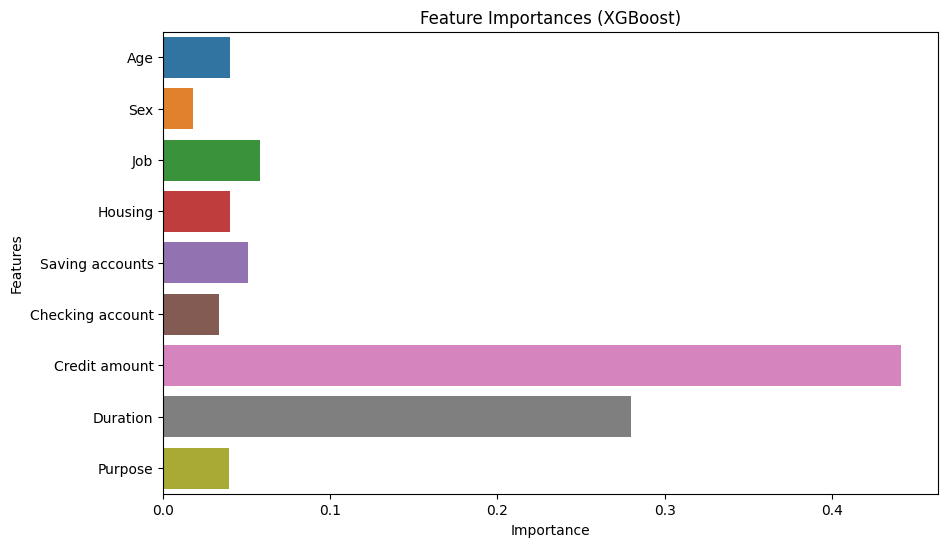

In [17]:
# Feature Importance Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=xgb_model.feature_importances_, y=X.columns)
plt.title("Feature Importances (XGBoost)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

In [19]:
import pickle
import pandas as pd

# Load the saved model
with open('xgboost_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Example input (like test data)
sample_input = pd.DataFrame({
    'Age': [35],
    'Sex': [1],
    'Job':[2],
    'Housing': [0],
    'Saving accounts': [2],
    'Checking account': [1],
    'Credit amount': [5000],
    'Duration': [12],
    'Purpose': [0]
})

# Predict
prediction = model.predict(sample_input)
print('Predicted Credit Risk:', 'Good Credit' if prediction[0]==1 else 'Bad Credit')


Predicted Credit Risk: Bad Credit
